In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/Lena_Image.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


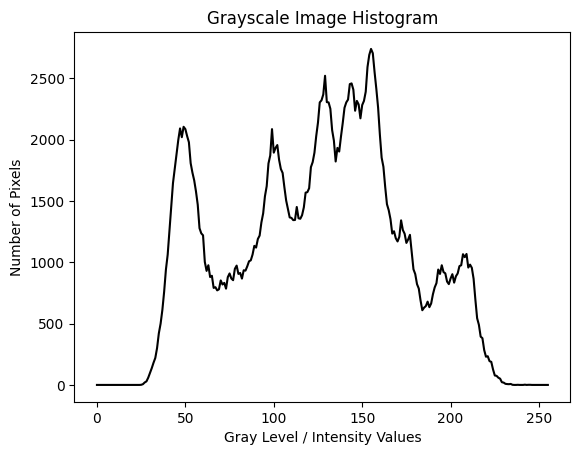

In [ ]:
# Compute and display histogram for grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.figure()
plt.plot(hist_gray, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Gray Level / Intensity Values")
plt.ylabel("Number of Pixels")
plt.show()

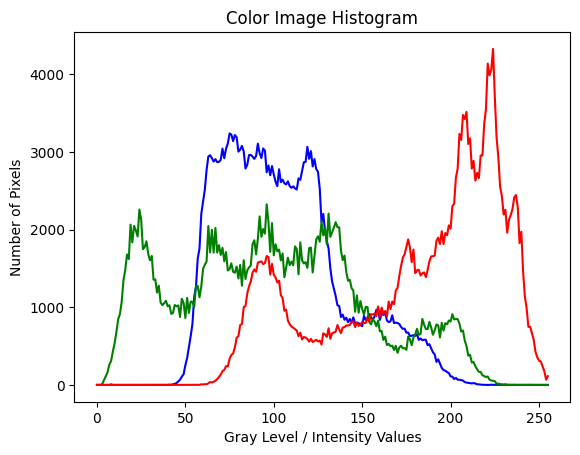

In [ ]:
# Compute and display histogram for color image
colors = ('b', 'g', 'r')
plt.figure()
for i, col in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("Color Image Histogram")
plt.xlabel("Gray Level / Intensity Values")
plt.ylabel("Number of Pixels")
plt.show()

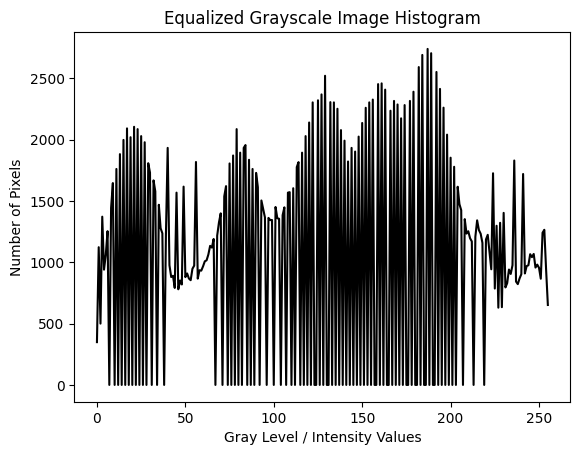

In [ ]:
# Histogram Equalization
equalized_gray = cv2.equalizeHist(gray_image)
hist_equalized = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

plt.figure()
plt.plot(hist_equalized, color='black')
plt.title("Equalized Grayscale Image Histogram")
plt.xlabel("Gray Level / Intensity Values")
plt.ylabel("Number of Pixels")
plt.show()


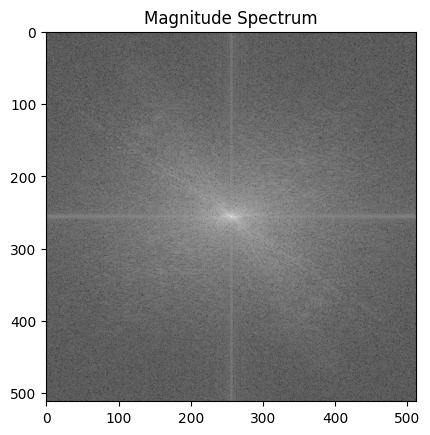

In [ ]:
# Fourier Transform
dft = np.fft.fft2(gray_image)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.show()

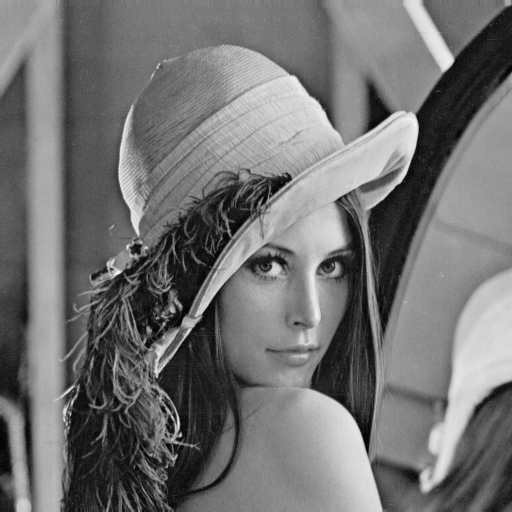

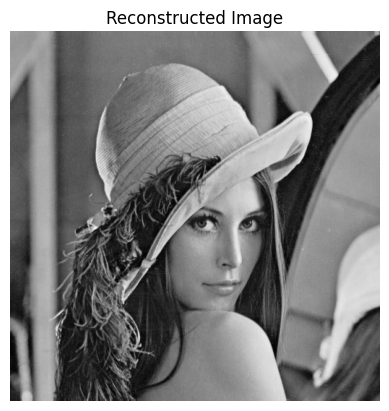

In [ ]:
# Inverse Fourier Transform
dft_ishift = np.fft.ifftshift(dft_shift)
img_reconstructed = np.fft.ifft2(dft_ishift)
img_reconstructed = np.abs(img_reconstructed)

# Normalize for better visualization
img_reconstructed = cv2.normalize(img_reconstructed, None, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(img_reconstructed.astype(np.uint8))
plt.figure()
plt.imshow(img_reconstructed, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

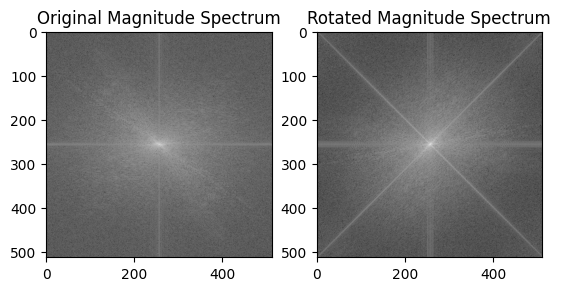

In [ ]:
# Rotate Image and Compute FFT
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
rotated_magnitude_spectrum = 20 * np.log(np.abs(dft_rotated_shift) + 1)

plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Original Magnitude Spectrum")

plt.subplot(1, 2, 2)
plt.imshow(rotated_magnitude_spectrum, cmap='gray')
plt.title("Rotated Magnitude Spectrum")
plt.show()